<a href="https://colab.research.google.com/github/SravyaV106/ChatWithLanguageTransilation/blob/main/Malaria_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, InputLayer, AveragePooling2D, BatchNormalization, MaxPool2D, Dense, Flatten, Input, Layer, Dropout
from tensorflow.keras.models import Model
import tensorflow_datasets as tfds
from tensorflow.keras import Sequential, activations
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.regularizers import L2
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNet, ResNet50

**Data Preparation and Data Visualization**

In [ ]:
dataset, dataset_info = tfds.load('malaria', with_info = True, shuffle_files= True, as_supervised=True, split=['train'])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/malaria/incomplete.4WJOXH_1.0.0/malaria-train.tfrecord*...:   0%|         …

Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


In [ ]:
uninfected = 0
paratized = 0
for image, label in dataset[0]:
  if label == 0:
    uninfected += 1
  else:
    paratized += 1

Streaming output truncated to the last 5000 lines.
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, 

In [ ]:
print(uninfected, paratized)

13779 13779


In [ ]:
print(dataset_info)

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir='/root/tensorflow_datasets/malaria/1.0.0',
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasit

In [ ]:
print(dataset_info.features)

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
})


In [ ]:
def split(dataset,TRAIN_RATIO,VAL_RATIO,TEST_RATIO):
  length = len(dataset)
  train = dataset.take(int(TRAIN_RATIO*length))
  val_test = dataset.skip(int(TRAIN_RATIO*length))
  val = val_test.take(int(VAL_RATIO*length))
  test = val_test.skip(int(VAL_RATIO*length))
  return train, val, test

In [ ]:
TRAIN_RATIO = 0.8
VAL_RATIO= 0.1
TEST_RATIO = 0.1

train_data, val_data, test_data = split(dataset[0], TRAIN_RATIO,VAL_RATIO,TEST_RATIO)

print(list(test_data.take(1).as_numpy_iterator()))

[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), np.int64(1))]


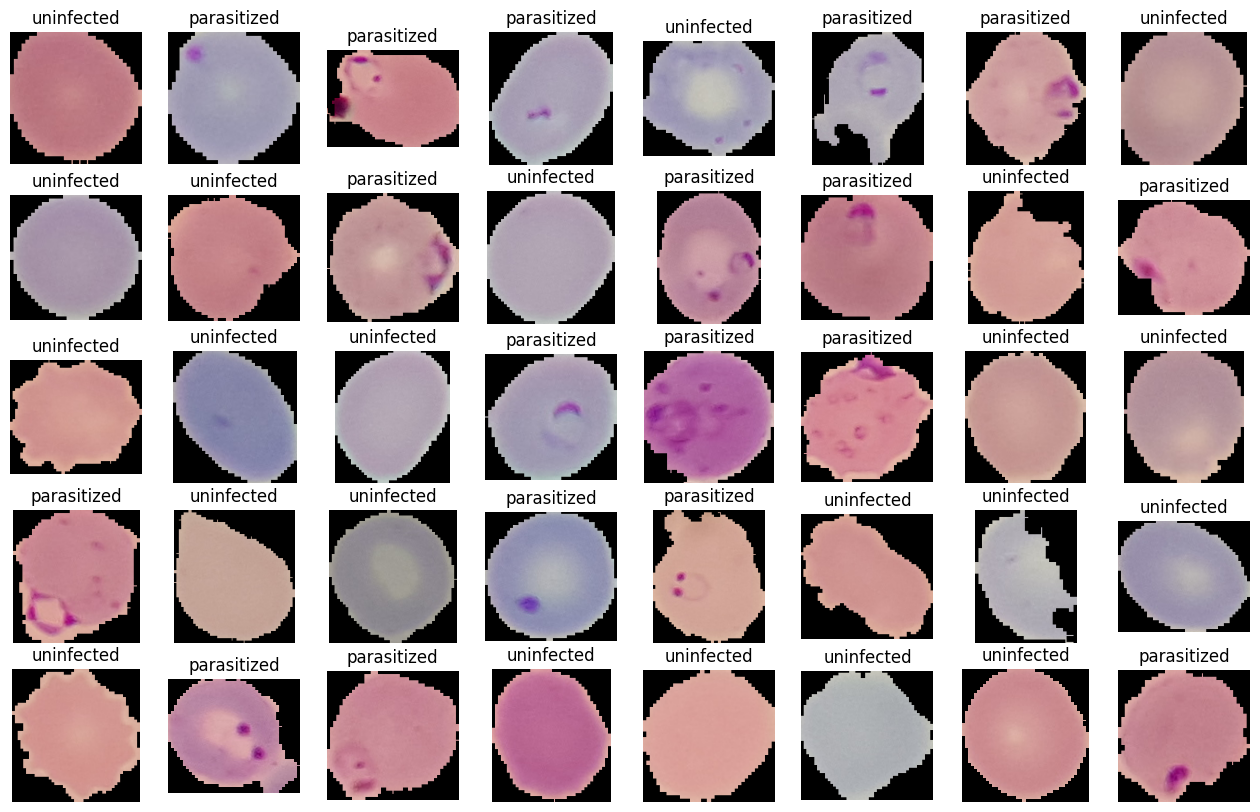

In [ ]:
plt.figure(figsize=(16, 10))
for i,(image, label) in enumerate(train_data.take(40)):
  ax = plt.subplot(5,8 , i+1)
  plt.imshow(image)
  plt.title(dataset_info.features['label'].int2str(label))
  plt.axis('off')

**Data Preprocessing** *'resizing all the images to 224px'*

In [ ]:
IM_SIZE = 224
def resizing(image,label):
  return tf.image.resize(image,(IM_SIZE, IM_SIZE))/255.0, label

In [ ]:

train_data = train_data.map(resizing)
val_data = val_data.map(resizing)
test_data = test_data.map(resizing)


In [ ]:
from tensorflow.python.data.ops.dataset_ops import AUTOTUNE
train_data = (train_data.shuffle(buffer_size= 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE))

In [ ]:
val_data = (val_data.shuffle(buffer_size= 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE))

In [ ]:
test_data= (test_data.shuffle(buffer_size= 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE))

# **building model**  

#MobileNet API

In [ ]:
mobilenet_model = MobileNet(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

model = models.Sequential([
    mobilenet_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

<ipython-input-11-e65441323bab>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet_model = MobileNet(input_shape=(64, 64, 3), include_top=False, weights='imagenet')


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

#Training


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional) │ (None, 2, 2, 1024)     │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,279,489 (16.32 MB)

 Trainable params: 4,257,601 (16.24 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=1,
                               mode='min',
                               verbose=1)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5,
    callbacks=[early_stopping]
)


Epoch 1/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 501s 702ms/step - accuracy: 0.8881 - loss: 0.8173 - val_accuracy: 0.9612 - val_loss: 0.1665
Epoch 2/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 497s 721ms/step - accuracy: 0.9525 - loss: 0.1414 - val_accuracy: 0.9525 - val_loss: 0.1466
Epoch 3/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 496s 713ms/step - accuracy: 0.9528 - loss: 0.1499 - val_accuracy: 0.9564 - val_loss: 0.1526
Epoch 3: early stopping


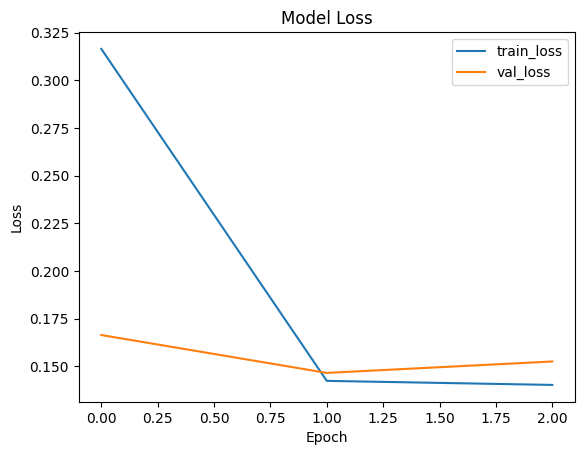

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

# **Model Evaluation and Testing**

In [ ]:
test_data


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
train_data


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
# val_data

In [ ]:
model.evaluate(test_data)

87/87 ━━━━━━━━━━━━━━━━━━━━ 22s 112ms/step - accuracy: 0.9515 - loss: 0.1565


[0.16362202167510986, 0.9510337114334106]

In [ ]:
y_true = test_data
y_pred = model.predict(test_data)
bce = tf.keras.losses.BinaryCrossentropy(from_logits=False)


87/87 ━━━━━━━━━━━━━━━━━━━━ 23s 110ms/step


In [ ]:
model.predict(test_data.take(1))[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


np.float32(0.00016682716)

In [ ]:
def parasite_or_not(x):
  if (x<0.5):
    return str('p')
  else:
    return str('U')

In [ ]:
parasite_or_not(model.predict(test_data.take(1))[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step


'p'

This model may not be as accurate because the no.of epoches is set to 5 for saving time, in practiece no.of epoch is set 100 for better accuracy.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 826ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


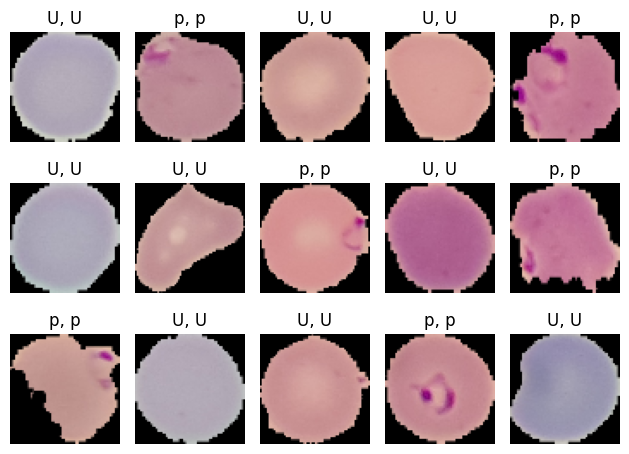

In [ ]:
for i, (image, label) in enumerate(test_data.take(15)):
    ax = plt.subplot(3, 5, i + 1)
    plt.imshow(image[0].numpy())
    true_label = label.numpy()[0]
    predicted_prob = model.predict(image)
    predicted_label = int(predicted_prob[0][0] > 0.5)

    plt.title(f"{parasite_or_not(true_label)}, {parasite_or_not(predicted_label)}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Confusion Matrics

In [ ]:
import sklearn
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
labels = []
inp = []
# for t in test_dataset:
#   print(t)
#   break
for x,y in test_data.as_numpy_iterator():
  labels.append(y)
  inp.append(x)

KeyboardInterrupt: 

In [ ]:
labels = np.array([i[0] for i in labels])
print(labels)